In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import pandas as pd

from sampling.ensamble import Sampler as EnsambleSampler

from benchmarks.benchmarks_mchmc import *
from benchmarks.german_credit import Target as GermanCredit
from benchmarks.brownian import Target as Brownian
from benchmarks.IRT import Target as IRT


num_cores = jax.local_device_count()
print(num_cores, jax.lib.xla_bridge.get_backend().platform)


targets = [[Banana(prior = 'prior'), 100],
        [IllConditionedGaussianGamma(prior = 'prior'), 10000],
        [GermanCredit(), 5000],
        [Brownian(), 1000],
        [IRT(), 500],
        [StochasticVolatility(), 1000]]

2023-06-01 08:18:17.366153: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-01 08:18:17.961011: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-01 08:18:17.961093: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-01 08:18:17.961098: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed proper

1 cpu


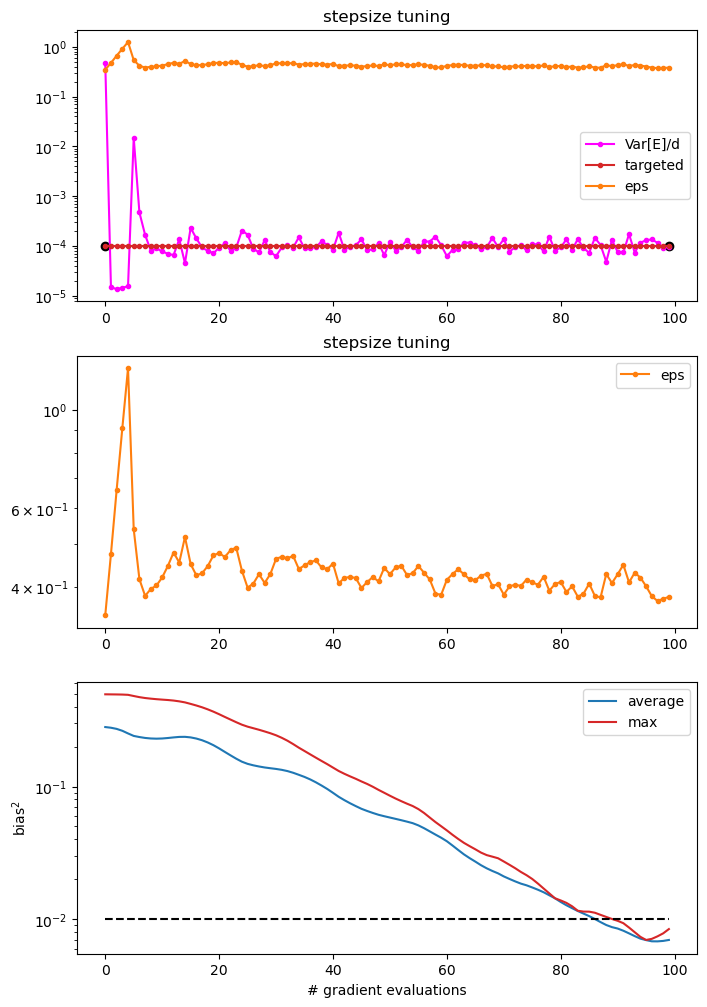

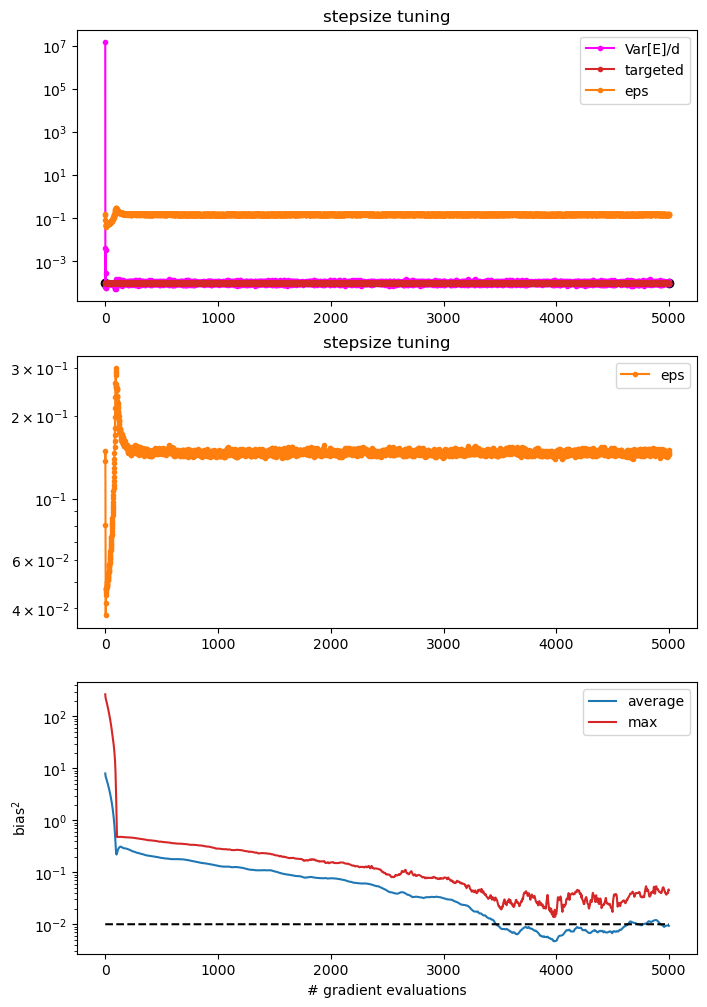

2023-06-01 08:18:40.124990: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-01 08:18:40.125015: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)


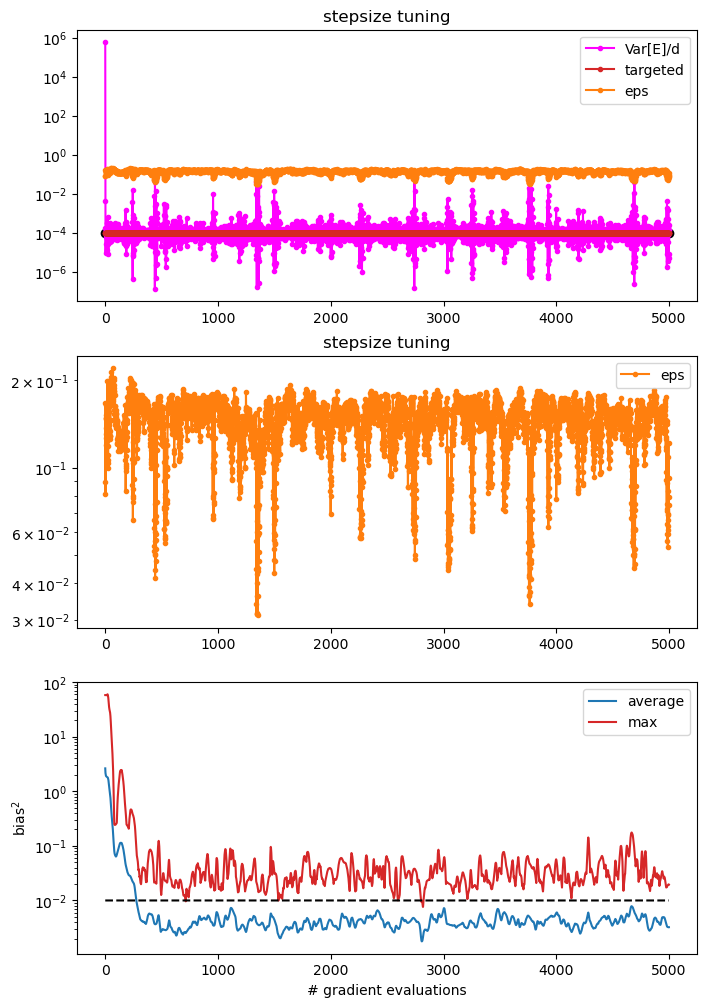

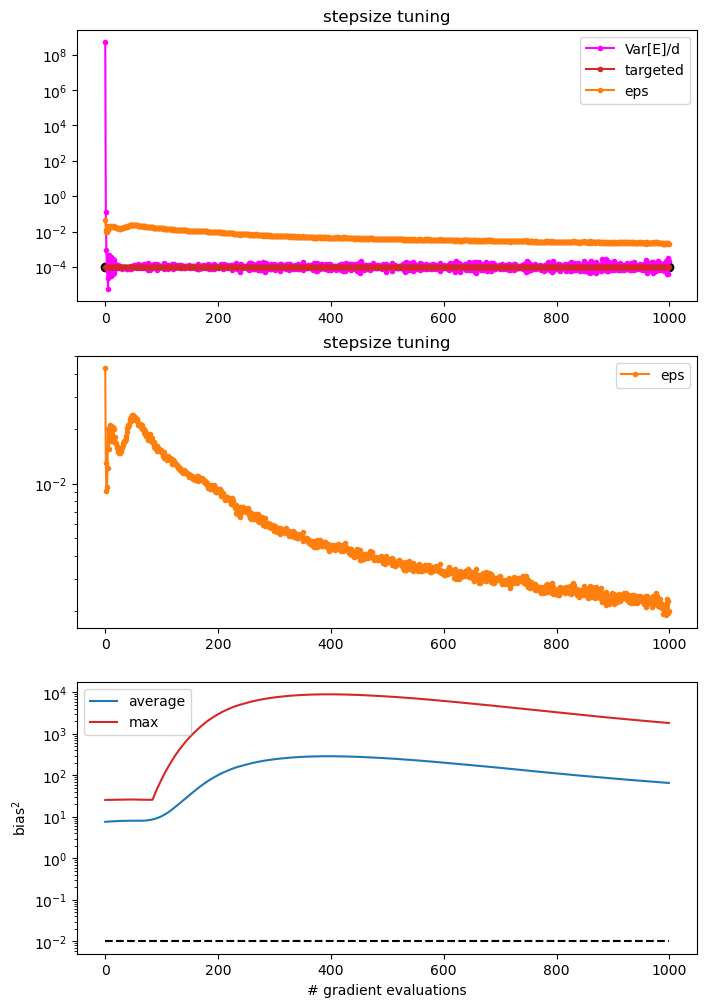

In [2]:
chains = 128*2

for i in [0, 1, 2, 3 ]:
    target, num_steps = targets[i]
    x0 = jnp.zeros(shape = (chains, target.d))
    sampler = EnsambleSampler(target, chains, diagonal_preconditioning = False)
    sampler.isotropic_u0 = True
    x = sampler.sample(num_steps, x_initial = x0)